In [1]:
import chess

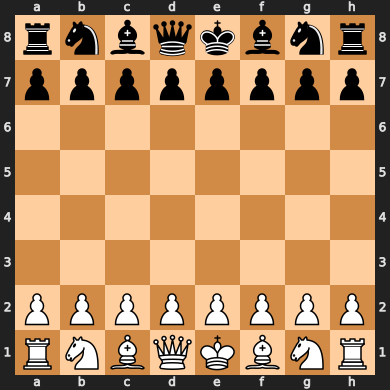

In [2]:
board = chess.Board()
board

In [5]:
import badgyal

bg = badgyal.BGNet(cuda=True)
board = chess.Board()

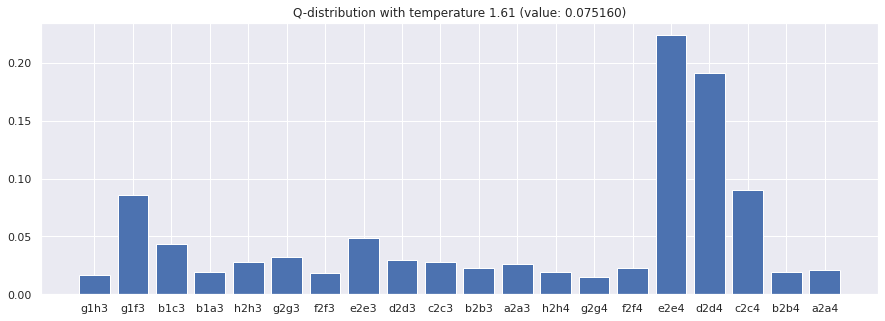

In [6]:
policy, value = bg.eval(board, softmax_temp=1.61)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

plt.figure(figsize=(15, 5))
plt.bar(policy.keys(), policy.values())
plt.title(f'Q-distribution with temperature 1.61 (value: {value:3f})')
plt.show()

In [7]:
a = max(policy, key=policy.get)
board.push(chess.Move.from_uci(a))

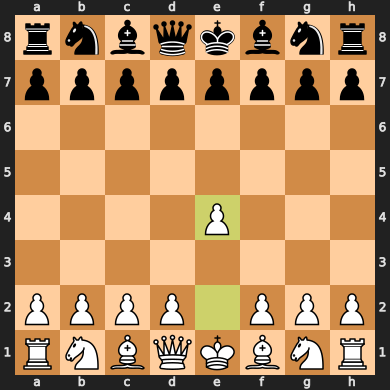

In [8]:
board

In [84]:
import gym_chess
import gym

In [10]:
env = gym.make('Chess-v0')
state = env.reset()
type(state)

chess.Board

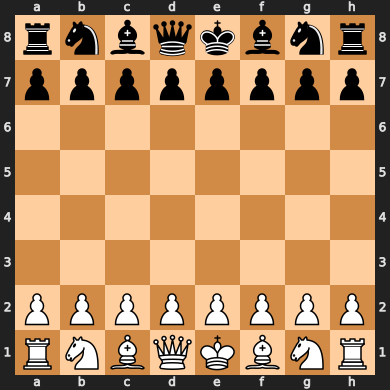

In [21]:
state

In [26]:
import random
next_state, *_ = env.step(random.choice(env.legal_moves))

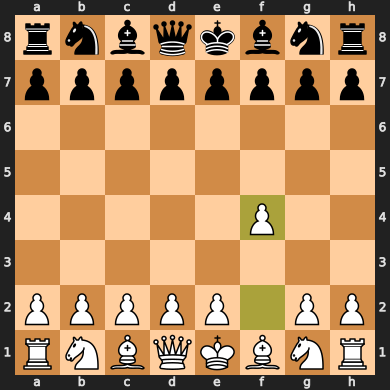

In [27]:
next_state

In [28]:
env.legal_moves

[Move.from_uci('g8h6'),
 Move.from_uci('g8f6'),
 Move.from_uci('b8c6'),
 Move.from_uci('b8a6'),
 Move.from_uci('h7h6'),
 Move.from_uci('g7g6'),
 Move.from_uci('f7f6'),
 Move.from_uci('e7e6'),
 Move.from_uci('d7d6'),
 Move.from_uci('c7c6'),
 Move.from_uci('b7b6'),
 Move.from_uci('a7a6'),
 Move.from_uci('h7h5'),
 Move.from_uci('g7g5'),
 Move.from_uci('f7f5'),
 Move.from_uci('e7e5'),
 Move.from_uci('d7d5'),
 Move.from_uci('c7c5'),
 Move.from_uci('b7b5'),
 Move.from_uci('a7a5')]

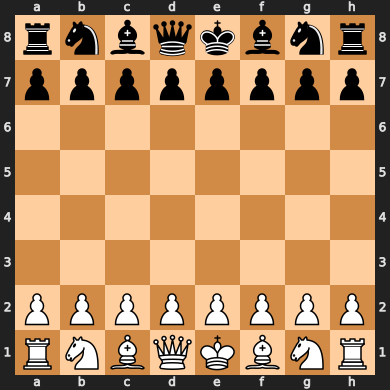

In [12]:
env = ChessVsRandom()
env.reset()

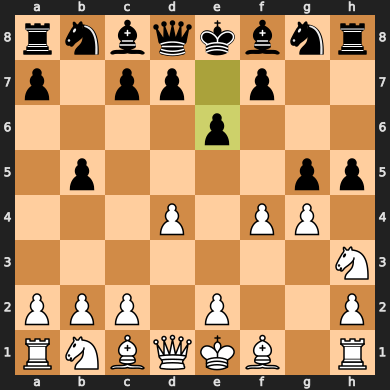

In [27]:
import random
env.step(random.choice(env.legal_moves))
env._board

In [1]:
from mlrl.meta.search_tree import SearchTree
from mlrl.meta.meta_env import MetaEnv
from mlrl.chess.chess_env import ChessVsRandom
from mlrl.chess.chess_state import ChessState, ChessQFunction

import badgyal


env = ChessVsRandom()
env.reset()

chess_network = badgyal.BGNet(cuda=True)
q_hat = ChessQFunction(chess_network)
initial_tree = SearchTree(env, ChessState.extract_state(env), q_hat)
meta_env = MetaEnv(env, initial_tree, max_tree_size=10)

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [4]:
from tf_agents.environments.tf_py_environment import TFPyEnvironment
from tf_agents.environments.gym_wrapper import GymWrapper

tf_meta_env = TFPyEnvironment(GymWrapper(meta_env))

In [9]:
from mlrl.utils.render_utils import embed_mp4, create_policy_eval_video
from mlrl.meta.meta_env import mask_invalid_action_constraint_splitter 
from tf_agents.policies.random_tf_policy import RandomTFPolicy

random_policy = RandomTFPolicy(tf_meta_env.time_step_spec(), tf_meta_env.action_spec(),
                               observation_and_action_constraint_splitter=mask_invalid_action_constraint_splitter)

embed_mp4(create_policy_eval_video(random_policy, tf_meta_env))

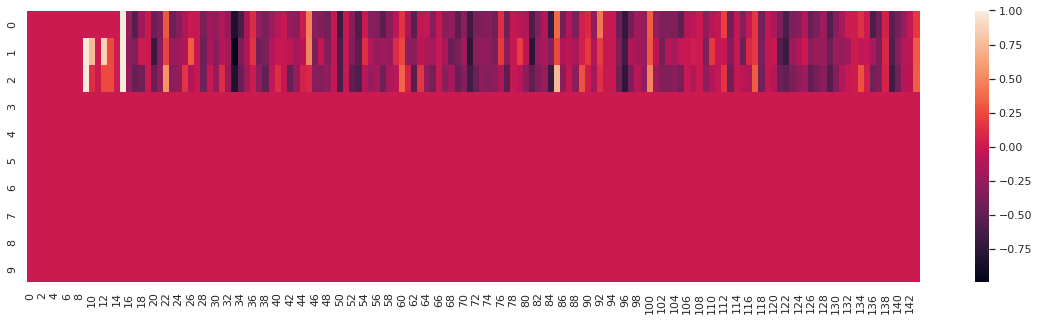

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

plt.figure(figsize=(20, 5))
sns.heatmap(observation['search_tree_tokens']);

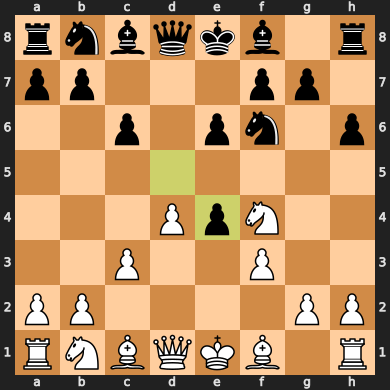

In [1]:
from mlrl.chess.chess_env import ChessVsSimpleNetwork
from IPython.display import clear_output, display
import chess


env = ChessVsSimpleNetwork()
env.reset()

try:
    while True:
        display(env._board)
        action = input('Enter action: ')
        observation, reward, done, info = env.step(chess.Move.from_uci(action))
        if done:
            break
        clear_output(wait=True)

except KeyboardInterrupt:
    pass